輸入立委臉書粉專內容及選舉政見資料

注意!jieba函式庫非內建需要額外下載:https://pypi.org/project/jieba/

In [15]:
import pandas as pd#引入環境內建函式庫pandas並簡寫其為pd\n
import jieba#引入斷詞函式庫jieba
from tqdm import tqdm#視覺化進度條模組，可以看斷詞迭代的進度
fb = pd.read_csv('nysu_10902_2019_research_right.csv')#用函式panda從電腦端資料夾中讀入csv數據庫並命名
politics = pd.read_csv('9th_legislator_promise.csv')

以新北市立委吳秉叡為例，建立發文文字斷詞表

---



In [16]:
wu = fb[fb.page_name == "吳秉叡"]#將資料庫從fb數據庫內抓出
wu.head(1)#叫出資料集中第一筆資料來看

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,NaN,NaN,996,0,0,0,0,0,17,18


In [17]:
wu[wu.created_time_taipei == max(wu.created_time_taipei)]#抓出發文時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26380,154631861234059_2916369525060265,154631861234059,吳秉叡,政治人物,NaN,NaN,photo,https://www.facebook.com/Wubray/photos/a.35703...,2020-01-01T01:20:24+0000,2020-01-01T09:20:24,...,動態時報相片,NaN,11,0,0,0,0,0,0,0


In [18]:
wu[wu.created_time_taipei == min(wu.created_time_taipei)]#抓出發文時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26379,154631861234059_2236975949666296,154631861234059,吳秉叡,政治人物,昨天中國國家主席習近平定調九二共識就是「一個中國」、「一國兩制」，打破藍營政治人物長年來說九...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-03T03:54:59+0000,2019-01-03T11:54:59,...,蔡英文 Tsai Ing-wen,我們始終未接受「九二共識」，根本原因就是北京當局所定義的「九二共識」，其實就是「一個中國」、...,467,0,0,0,0,0,16,10


In [19]:
wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)
wu.head(1)

<ipython-input-19-055f912b17e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['new_date'] = pd.to_datetime(wu['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
<ipython-input-19-055f912b17e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wu['month_year'] = pd.to_datetime(wu['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26375,154631861234059_2254345517929339,154631861234059,吳秉叡,政治人物,1/17(四)到1/20(日)上午，大秉將於新莊各大市場向各位拜年並贈送春聯，喜歡可愛的【金...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-01-15T08:02:58+0000,2019-01-15T16:02:58,...,996,0,0,0,0,0,17,18,2019-01-15,2019-01


In [20]:
wu = wu.sort_values(by=['like_count'],ascending=0)#將資料以按讚數進行排列(ascending為0降序排)
wu

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26648,154631861234059_2903081099722441,154631861234059,吳秉叡,政治人物,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-26T09:00:41+0000,2019-12-26T17:00:41,...,18460,0,0,0,0,0,447,281,2019-12-26,2019-12
26639,154631861234059_2845884475442104,154631861234059,吳秉叡,政治人物,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,吳秉叡──和吳秉叡及其他 3 人。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-01T13:40:44+0000,2019-12-01T21:40:44,...,12134,0,0,0,0,0,203,110,2019-12-01,2019-12
26680,154631861234059_2878500665513818,154631861234059,吳秉叡,政治人物,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-15T10:43:25+0000,2019-12-15T18:43:25,...,8353,0,0,0,0,0,210,100,2019-12-15,2019-12
26678,154631861234059_2880162658680952,154631861234059,吳秉叡,政治人物,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-16T04:14:14+0000,2019-12-16T12:14:14,...,8323,0,0,0,0,0,170,102,2019-12-16,2019-12
26657,154631861234059_2894168503947034,154631861234059,吳秉叡,政治人物,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-22T11:28:35+0000,2019-12-22T19:28:35,...,6832,0,0,0,0,0,137,88,2019-12-22,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26392,154631861234059_2285261364837754,154631861234059,吳秉叡,政治人物,NaN,吳秉叡更新了封面相片。,photo,https://www.facebook.com/154631861234059/posts...,2019-02-05T02:59:17+0000,2019-02-05T10:59:17,...,153,0,0,0,0,0,12,1,2019-02-05,2019-02
26431,154631861234059_2495607203803168,154631861234059,吳秉叡,政治人物,"懸賞秋行軍🦗，全民動起來\n\n為了提高民眾防蟲害意識和動機，行政院已編列好軍費與""秋行軍""...",NaN,video,https://www.facebook.com/154631861234059/posts...,2019-06-14T03:41:07+0000,2019-06-14T11:41:07,...,149,0,0,0,0,0,2,8,2019-06-14,2019-06
26400,154631861234059_2305824022781488,154631861234059,吳秉叡,政治人物,【元宵節快樂】\n今天元宵節是豬年來第一個月圓，是祭月、賞月的日子，這是傳統新春定義的最後一...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-02-19T03:00:00+0000,2019-02-19T11:00:00,...,135,0,0,0,0,0,17,5,2019-02-19,2019-02
26401,154631861234059_2300931396604084,154631861234059,吳秉叡,政治人物,蘇貞昌上任行政院長後的首度施政報告，想知道行政院接下來將會致力完成什麼目標嗎？一起來看直播！...,吳秉叡,video,https://www.facebook.com/154631861234059/posts...,2019-02-15T02:27:10+0000,2019-02-15T10:27:10,...,133,0,0,0,0,0,3,6,2019-02-15,2019-02


In [21]:
wu.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)
wu

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,26648,154631861234059_2903081099722441,154631861234059,吳秉叡,政治人物,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-26T09:00:41+0000,...,18460,0,0,0,0,0,447,281,2019-12-26,2019-12
1,26639,154631861234059_2845884475442104,154631861234059,吳秉叡,政治人物,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,吳秉叡──和吳秉叡及其他 3 人。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-01T13:40:44+0000,...,12134,0,0,0,0,0,203,110,2019-12-01,2019-12
2,26680,154631861234059_2878500665513818,154631861234059,吳秉叡,政治人物,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-15T10:43:25+0000,...,8353,0,0,0,0,0,210,100,2019-12-15,2019-12
3,26678,154631861234059_2880162658680952,154631861234059,吳秉叡,政治人物,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-16T04:14:14+0000,...,8323,0,0,0,0,0,170,102,2019-12-16,2019-12
4,26657,154631861234059_2894168503947034,154631861234059,吳秉叡,政治人物,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,吳秉叡──和吳秉叡。,photo,https://www.facebook.com/154631861234059/posts...,2019-12-22T11:28:35+0000,...,6832,0,0,0,0,0,137,88,2019-12-22,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,26392,154631861234059_2285261364837754,154631861234059,吳秉叡,政治人物,NaN,吳秉叡更新了封面相片。,photo,https://www.facebook.com/154631861234059/posts...,2019-02-05T02:59:17+0000,...,153,0,0,0,0,0,12,1,2019-02-05,2019-02
312,26431,154631861234059_2495607203803168,154631861234059,吳秉叡,政治人物,"懸賞秋行軍🦗，全民動起來\n\n為了提高民眾防蟲害意識和動機，行政院已編列好軍費與""秋行軍""...",NaN,video,https://www.facebook.com/154631861234059/posts...,2019-06-14T03:41:07+0000,...,149,0,0,0,0,0,2,8,2019-06-14,2019-06
313,26400,154631861234059_2305824022781488,154631861234059,吳秉叡,政治人物,【元宵節快樂】\n今天元宵節是豬年來第一個月圓，是祭月、賞月的日子，這是傳統新春定義的最後一...,NaN,photo,https://www.facebook.com/154631861234059/posts...,2019-02-19T03:00:00+0000,...,135,0,0,0,0,0,17,5,2019-02-19,2019-02
314,26401,154631861234059_2300931396604084,154631861234059,吳秉叡,政治人物,蘇貞昌上任行政院長後的首度施政報告，想知道行政院接下來將會致力完成什麼目標嗎？一起來看直播！...,吳秉叡,video,https://www.facebook.com/154631861234059/posts...,2019-02-15T02:27:10+0000,...,133,0,0,0,0,0,3,6,2019-02-15,2019-02


結巴斷詞 jieba

1.   len(wu): 看貼文總共有幾筆
2.   list(wu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做wu_docs，型態是pandas.core.frame.DataFrame
4.   原本wu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [37]:
doc_names = range(len(wu)) #len(wu):看有幾篇文章
doc_names

range(0, 316)

In [38]:
import numpy as np #引入向量矩陣運算函式庫numpy
wu = wu.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(wu['message'])#list(wu['message']): 把要斷詞的內容轉成 list 格式(有順序性的格式)
wu_docs = pd.DataFrame(columns=['jieba_results'])#創造一個新的dataframe叫做wu_docs，型態是pandas.core.frame.DataFrame
wu_docs['jieba_results'] = wu_docs['jieba_results'].astype('str')#原本wu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [39]:
text_list[314]

'蘇貞昌上任行政院長後的首度施政報告，想知道行政院接下來將會致力完成什麼目標嗎？一起來看直播！\n\u3000\n🎬 直播連結：https://www.facebook.com/45289011269/videos/295061884526084/'

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為
1精確模式:將句子最精確的切開，適合文本分析
2全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。
3搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式：
透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式
jibea.cut_for_search () 是搜索引擎模式
cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。
也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [40]:
words = jieba.lcut(text_list[0], cut_all =False)#精確模式斷詞
print(words)

['📣', '小英', '總統', '來', '囉', '📣', '\n', '選前', '黃', '金週', '，', '蔡英文', '總統', '將到', '新莊', '運動', '公園', '陽光', '草坪', '與', '鄉', '親們', '見面', '，', '邀請', '所有', '支持', '小英', '、', '疼惜', '秉', '叡', '的', '朋友', '，', '我們', '相約', '一同', '為', '台灣', '加油', '。', '\n', '\n', '🎉', '2020', '台灣', '要贏', ' ', '新莊', '選前', '造勢', '晚會', '🎉', '\n', '⏰', '活動', '時間', ':', ' ', '1', '/', '5', '(', '日', ')', ' ', '18', ':', '30', '\n', '🏢', '活動', '地點', ':', ' ', '新莊', '運動', '公園', '陽光', '草坪', '\n', '\n', '#', '台灣', '要贏', '新莊', '先贏', '\n', '#', '顧', '台灣', '會', '做事']


In [41]:
words = jieba.lcut(text_list[0], cut_all =True)#全模式斷詞
print(words)

['📣', '小', '英', '總統', '來', '囉', '📣', '\n', '', '選', '前', '黃', '金', '週', '，', '蔡英文', '英文', '總統', '將', '到', '新莊', '運', '動', '公', '園', '陽', '光', '草坪', '與', '鄉', '親', '們', '見', '面', '，', '邀', '請', '所有', '支持', '小', '英', '、', '疼惜', '秉', '叡', '的', '朋友', '，', '我', '們', '相', '約', '一同', '為', '台灣', '加油', '。', '\n', '', '\n', '🎉', '2020', '台灣', '要', '贏', '', ' ', '', '新莊', '選', '前', '造', '勢', '晚', '會', '🎉', '\n', '⏰', '活', '動', '時', '間', ':', ' ', '', '1', '/', '5', '(', '日', ')', ' ', '', '18', ':', '30', '', '\n', '🏢', '活', '動', '地', '點', ':', ' ', '', '新莊', '運', '動', '公', '園', '陽', '光', '草坪', '', '\n', '', '\n', '', '#', '台灣', '要', '贏', '新莊', '先', '贏', '', '\n', '', '#', '顧', '台灣', '會', '做事']


In [42]:
words = jieba.lcut(text_list[314], cut_all = False)
print(words)

['蘇貞昌', '上任', '行政', '院長', '後', '的', '首度', '施政', '報告', '，', '想', '知道', '行政院', '接下', '來', '將會', '致力', '完成', '什麼', '目標', '嗎', '？', '一起', '來', '看', '直播', '！', '\n', '\u3000', '\n', '🎬', ' ', '直播', '連結', '：', 'https', ':', '/', '/', 'www', '.', 'facebook', '.', 'com', '/', '45289011269', '/', 'videos', '/', '295061884526084', '/']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，篇數有314篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到314(第314篇)；</br> 而text_list就是我們剛剛轉成list型態的貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和wu_docs合併。</br> 最後我們wu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [43]:
import jieba#引入斷詞模組jieba
from tqdm import tqdm#進度條模組,可輔助觀看迴圈執行進度
import re#引入正規運算式模組re
jieba.load_userdict("wu_dict.txt")#建立一個使用者定義詞庫使jieba斷詞結果更精確

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    wu_docs = wu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回wu_docs

In [44]:
wu_docs

,jieba_results
0,📣 小英 總統 來 囉 📣 選前 黃 金週 蔡英文 總統 將到 新莊 運動 公園 陽光 草...
1,今天 小英 新北 競總大會 盛大 舉行 蔡英文 - 總統 陳 建仁 ...
2,今天 總統 蔡英文 立委 吳秉叡 北 新莊 競選總部 成立 大會 順利 成功 感謝 賴...
3,錯過 了 昨天 與 六千 位鄉親 一同 相挺 好 立委 的 盛事 嗎 這週 日 讓 我...
4,今日 總統 蔡英文 立委 吳秉叡 南 新莊 競選總部 成立 大會 順利 成功 感謝 陳...
...,...
311,
312,懸賞 秋行 軍 🦗 全民 動起 來 為 了 提高 民眾 防蟲害 意識 和 動機 行政院 已...
313,元宵 節快 樂 今天 元宵 節是 豬年 來 第一 個月圓 是 祭 月 賞月 的 日子 這是...
314,蘇貞昌 上任 行政 院長 後 的 首度 施政 報告 想 知道 行政院 接下 來 將會 致力...


In [45]:
wu['jieba_results'] = wu_docs
wu_post = wu[['new_date','message','jieba_results','like_count']]
wu_post

,new_date,message,jieba_results,like_count
0,2019-12-26,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,📣 小英 總統 來 囉 📣 選前 黃 金週 蔡英文 總統 將到 新莊 運動 公園 陽光 草...,18460
1,2019-12-01,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,今天 小英 新北 競總大會 盛大 舉行 蔡英文 - 總統 陳 建仁 ...,12134
2,2019-12-15,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,今天 總統 蔡英文 立委 吳秉叡 北 新莊 競選總部 成立 大會 順利 成功 感謝 賴...,8353
3,2019-12-16,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,錯過 了 昨天 與 六千 位鄉親 一同 相挺 好 立委 的 盛事 嗎 這週 日 讓 我...,8323
4,2019-12-22,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,今日 總統 蔡英文 立委 吳秉叡 南 新莊 競選總部 成立 大會 順利 成功 感謝 陳...,6832
...,...,...,...,...
311,2019-02-05,,,153
312,2019-06-14,"懸賞秋行軍🦗，全民動起來\n\n為了提高民眾防蟲害意識和動機，行政院已編列好軍費與""秋行軍""...",懸賞 秋行 軍 🦗 全民 動起 來 為 了 提高 民眾 防蟲害 意識 和 動機 行政院 已...,149
313,2019-02-19,【元宵節快樂】\n今天元宵節是豬年來第一個月圓，是祭月、賞月的日子，這是傳統新春定義的最後一...,元宵 節快 樂 今天 元宵 節是 豬年 來 第一 個月圓 是 祭 月 賞月 的 日子 這是...,135
314,2019-02-15,蘇貞昌上任行政院長後的首度施政報告，想知道行政院接下來將會致力完成什麼目標嗎？一起來看直播！...,蘇貞昌 上任 行政 院長 後 的 首度 施政 報告 想 知道 行政院 接下 來 將會 致力...,133


NameError: name 'plt' is not defined

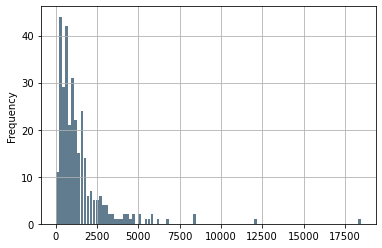

In [47]:
commutes = wu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [48]:
temp = wu_post[(wu_post['like_count'] <= 19000) & (wu_post['like_count'] > 1000)]
temp

,new_date,message,jieba_results,like_count
0,2019-12-26,📣小英總統來囉📣\n選前黃金週，蔡英文總統將到新莊運動公園陽光草坪與鄉親們見面，邀請所有支持...,📣 小英 總統 來 囉 📣 選前 黃 金週 蔡英文 總統 將到 新莊 運動 公園 陽光 草...,18460
1,2019-12-01,今天小英新北競總大會盛大舉行， 蔡英文 Tsai Ing-wen總統、 陳建仁 Chen C...,今天 小英 新北 競總大會 盛大 舉行 蔡英文 - 總統 陳 建仁 ...,12134
2,2019-12-15,今天總統蔡英文、立委吳秉叡北新莊競選總部成立大會順利成功，感謝 賴清德院長、 蘇貞昌院長、 ...,今天 總統 蔡英文 立委 吳秉叡 北 新莊 競選總部 成立 大會 順利 成功 感謝 賴...,8353
3,2019-12-16,錯過了昨天與六千位鄉親一同相挺好立委的盛事嗎？ 這週日讓我們為新莊再站出來一回！\n\n#台...,錯過 了 昨天 與 六千 位鄉親 一同 相挺 好 立委 的 盛事 嗎 這週 日 讓 我...,8323
4,2019-12-22,今日總統蔡英文、立委吳秉叡南新莊競選總部成立大會順利成功，感謝 陳建仁 Chen Chien...,今日 總統 蔡英文 立委 吳秉叡 南 新莊 競選總部 成立 大會 順利 成功 感謝 陳...,6832
...,...,...,...,...
151,2019-08-11,大家早安！☀️ 周末假日持續衝衝衝！！🏃‍♂️\n \n這幾天大秉跑遍了新莊的大街小巷，跟鄉...,大家 早安 ☀ ️ 周末 假日 持續 衝衝衝 🏃 ‍ ♂ ️ 這幾 天大 秉 跑遍...,1021
152,2019-11-05,八年前、相挺秉叡的新莊鄉親們成立了 秉友會，一路上勞心勞力為了秉叡籌辦各類活動，努力幫助秉叡...,八年 前 相挺 秉 叡 的 新莊 鄉 親們 成立 了 秉友會 一路上 勞心 勞力 為 ...,1010
153,2019-08-08,由於強烈颱風利奇馬襲台，北北基己確認明日8/9(五)停班停課，請各位儘早做好防颱準備，秉叡祈...,由 於 強烈 颱 風利 奇馬襲 台 北北 基己 確認 明日 / 五 停班 停課 請 各...,1009
154,2019-11-25,小英新北競總熱鬧成立，舞台秀X園遊會邀您一起出來玩\n\n距離大選時間愈來愈近，2020 蔡...,小英 新北 競總熱鬧 成立 舞台 秀 園遊會 邀 您 一起 出來 玩 距離 大選 時間 ...,1008


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [49]:
corpus = temp['jieba_results'].values.tolist()

In [50]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [51]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['台南市', '號碼', '噪音', '課綱', '淹水', '國中', '教育', '高點', '捐贈', '人員']
TOP 10 WORDS PER TOPIC #1
['支持', '成立', '蔡英文', '立委', '要贏', '活動', '吳秉叡', '總統', '台灣', '新莊']
TOP 10 WORDS PER TOPIC #2
['道路', '品妤', '公室', '大秉', '捐血', '地方', '堤外', '園遊會', '住民', '大家']
TOP 10 WORDS PER TOPIC #3
['台灣', '配戴', '呼清', '新莊', '人生', '服務', '活動', '敬老', '眼鏡', '免費']
TOP 10 WORDS PER TOPIC #4
['爭取', '居民', '環境', '交通', '建設', '工程', '中央', '地方', '改善', '新莊']
TOP 10 WORDS PER TOPIC #5
['做事', '健康', '市場', '鄉親', '歡迎', '媽媽', '活動', '早上', '新莊', '爬山']
TOP 10 WORDS PER TOPIC #6
['大餅', '申請', '胖卡', '高點', '五股', '身分', '醫療', '交流', '新版', '住民']
TOP 10 WORDS PER TOPIC #7
['香港', '初選', '初衷', '好消息', '我們', '右眼', '艱難', '選戰', '順澤宮', '港人']


新北立委為何出現台南與淹水？該則貼文內容是「網上瘋傳一組台南市淹水照片，指控台南市也因丹娜絲颱風造成淹水災情但卻無人聞問。經查，照片除了是過去的新聞照外，甚至拿高雄淹水的照片來充數，目前台南市府已報警處理，除了追究造謠者的責任外，秉叡也請大家轉發本文，一起來幫忙澄清。」

In [53]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['努力', '院長', '大家', '繼續', '幼兒園', '民主', '我們', '一起', '守護', '台灣']
TOP 10 WORDS PER TOPIC #1
['中心', '法官', '選區', '服務', '敬老', '新北市', '眼鏡', '新莊', '免費', '活動']
TOP 10 WORDS PER TOPIC #2
['課綱', '政府', '大家', '努力', '做事', '鄉親', '台灣', '我們', '新莊', '服務']
TOP 10 WORDS PER TOPIC #3
['匝道', '車流', '努力', '做事', '居民', '地方', '交通', '改善', '台灣', '新莊']
TOP 10 WORDS PER TOPIC #4
['清潔隊', '大家', '蘇貞昌', '鄉親', '我們', '環境', '清潔', '繼續', '感謝', '新莊']
TOP 10 WORDS PER TOPIC #5
['健康', '爬山', '早上', '住民', '園遊會', '一起', '我們', '台灣', '活動', '新莊']
TOP 10 WORDS PER TOPIC #6
['交通', '計畫', '努力', '解決', '問題', '建設', '新莊', '工程', '地方', '中央']
TOP 10 WORDS PER TOPIC #7
['蔡英文', '支持', '要贏', '立委', '活動', '做事', '吳秉叡', '總統', '台灣', '新莊']


In [58]:
politics_wu = politics[politics.姓名 == "吳 秉 叡"].政見.to_string()
politics_wu = re.sub(re_punctuation, "", politics_wu)
politics_wu = re.sub(r'[0-9]','',politics_wu)
politics_wu = re.sub(r'[a-zA-Z]','',politics_wu)
jieba.load_userdict("wu_dict.txt")
words = jieba.lcut(politics_wu, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '臺', '灣現', '正面', '臨貧富', '差距', '擴大', '、', '食品安全', '風暴', '、', '財政惡化', '、', '民主', '倒退', '等', '嚴峻', '挑戰', '，', '為', '爭取', '安心', '安全', '、', '永續經', '...']


In [59]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['嚴峻', '永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴', '差距']
TOP 10 WORDS PER TOPIC #1
['民主', '安心', '擴大', '正面', '灣現', '風暴', '倒退', '食品安全', '嚴峻', '永續經']
TOP 10 WORDS PER TOPIC #2
['永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴', '民主', '臨貧富']
TOP 10 WORDS PER TOPIC #3
['安全', '嚴峻', '永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴']
TOP 10 WORDS PER TOPIC #4
['安全', '嚴峻', '永續經', '食品安全', '倒退', '灣現', '安心', '擴大', '正面', '風暴']
TOP 10 WORDS PER TOPIC #5
['嚴峻', '永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴', '挑戰']
TOP 10 WORDS PER TOPIC #6
['嚴峻', '永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴', '財政惡化']
TOP 10 WORDS PER TOPIC #7
['永續經', '食品安全', '倒退', '安心', '擴大', '正面', '灣現', '風暴', '安全', '爭取']
